# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [17]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'dataset/train.p'
testing_file = 'dataset/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(list(y_train)+list(y_test)))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

TypeError: unhashable type: 'numpy.ndarray'

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2
import matplotlib.image as mpimg
import random
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

[9]


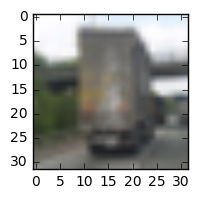

In [4]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

X_train = X_train/255.0
X_test = X_test/255.0

[9]


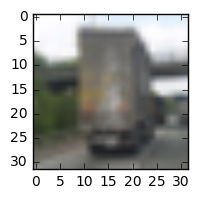

In [6]:
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** My preprocessing was simply to divide all colour channels of the images by 255. This makes all of the data lie in the range between 0 and 1. The LeNet architecture seems to make better predictions when the input data is limited to this range. 
I tested out a few different colour spaces and found that, despite the differing brightness across the dataset, RGB gave the best results. I tried using both HSV and YUV colour with various normalizations techniques on their channels, but in all cases, RGB with values between 0 and 1 performed better. 

In [7]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


In [8]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The first step I took was to shuffle the data in order to prevent any potential patterns in the way the data is arranged from affecting the training of my network. Secondly, I separated out a random sampling of 20% of the training data to use as a validation set.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [10]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 256

In [11]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    with tf.name_scope('convolutional_1') as scope:
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma), name='weights_1')
        conv1_b = tf.Variable(tf.zeros(6), name='biases_1')
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    with tf.name_scope('activation_1') as scope:
        conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    with tf.name_scope('pooling_1') as scope:
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    with tf.name_scope('convolutional_2') as scope:
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='weights_2')
        conv2_b = tf.Variable(tf.zeros(16), name='biases_2')
        conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    with tf.name_scope('activation_2') as scope:
        conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    with tf.name_scope('pooling_2') as scope:
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    with tf.name_scope('flatten') as scope:
        fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    with tf.name_scope('fully_connected_1') as scope:
        fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='weights_3')
        fc1_b = tf.Variable(tf.zeros(120), name='biases_3')
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    with tf.name_scope('activation_3') as scope:
        fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    with tf.name_scope('fully_connected_2') as scope:
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='weights_4')
        fc2_b  = tf.Variable(tf.zeros(84), name='biases_4')
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    with tf.name_scope('activation_4') as scope:
        fc2    = tf.nn.relu(fc2)

    #Dropout
    with tf.name_scope('dropout') as scope:
        h_fc2_drop = tf.nn.dropout(fc2, keep_prob)
        
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    with tf.name_scope('fully_connected_3') as scope:
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 10), mean = mu, stddev = sigma), name='weights_5')
        fc3_b  = tf.Variable(tf.zeros(10), name='biases_5')
        logits = tf.matmul(h_fc2_drop, fc3_W) + fc3_b
    
    return logits

In [12]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3), name='input_image')
y = tf.placeholder(tf.int32, (None), name='output_labels')
with tf.device('/cpu:0'): #Workaround for tensorflow-gpu in windows 10
    one_hot_y = tf.one_hot(y, 10)
keep_prob = tf.placeholder(tf.float32)


In [13]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [15]:
tf.summary.scalar('learning_rate', rate)
tf.summary.scalar("validation_accuracy", accuracy_operation)
tf.summary.scalar("loss", loss_operation)
summary_op = tf.summary.merge_all()

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** My network is very similar to the LeNet architecture outlined in the Udacity lessons leading up to this project. The only change I made to the architecture was the addition of a dropout layer just before the final fully connected layer. 

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
#
logs_path = '/tb_logs'
writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            
            _, summary = sess.run([training_operation, summary_op], feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            if offset % 100 == 0:
                writer.add_summary(summary, EPOCHS * BATCH_SIZE + i)
            
        validation_accuracy = evaluate(X_val, y_val)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'saved_training/lenet')
    print("Model saved")

Training...



InvalidArgumentError: Incompatible shapes: [256] vs. [256,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/gpu:0"](ArgMax, ArgMax_1)]]
	 [[Node: Mean/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_111_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Equal', defined at:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-e90eeb5a6f12>", line 1, in <module>
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 728, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [256] vs. [256,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/gpu:0"](ArgMax, ArgMax_1)]]
	 [[Node: Mean/_23 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_111_Mean", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('saved_training/.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** For training, I used Tensorflow's Adam Optimizer. I tested various batch sizes and numbers of epochs - I found that batches of 128 gave me the best results. Increasing the batch size tended to lower the validation accuracy of my network while not making a major difference in my processing time.  I used 100 epochs while training. I did everything from 10 to 500 epochs while developing my code and found that 100 gave acceptable performance for the purposes of this project. 500 gave slightly more validation accuracy but took significantly more time to train. Since I was making lots of changes and running the training process many times, I decided that using 100 epochs was a good balance of time and performance. I also tested various learning rates and settled on 0.001 since it gave me the best results.

I left the LeNet hyperparameters as recommended in the lesson preceding the project.

With this setup, I was able to get ~99% validation accuracy and 94.8% test accuracy.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Admittedly, my approach was mostly trial and error. This was my first time working with a neural network, so I spent a lot of time experimenting and seeing what effect different parameter changes would have on the accuracy. I focused primarily on optimizing the batch size, number of epochs, and the learning rate. I decided to work on tweaking these parameters because they seemed to have the most discernable impact on the accuracy of the network. I avoided changing the LeNet hyperparameters, 'mu' and 'sigma' since I'm not exactly clear on their impact. 

I used the LeNet architecture as outlined in the lessons with an additional dropout layer added just before the final fully connected layer.  I was able to get validation accuracy around 99%, so I felt comfortable sticking with the LeNet architecture; it seems to do a good job on this sort of image recognition task. The addition of the dropout layer helps to prevent overfitting of the data. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
from skimage import io
from skimage import data

num_imgs = 10
test_imgs = np.uint8(np.zeros((num_imgs,32,32,3)))

for i in range(1,num_imgs+1):
    image = io.imread('./new_images/{}.png'.format(str(i)))
    image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    image = cv2.resize(image, (32, 32)) 
    test_imgs[i-1] = image

test_images = (test_imgs.reshape((-1, 32, 32, 3)).astype(np.float32))/255.0

In [ ]:
fig, ax = plt.subplots(num_imgs, 1)
for i in range(num_imgs):
    ax[i].imshow(test_imgs[i])
    plt.setp(ax[i].get_xticklabels(), visible=False)
    plt.setp(ax[i].get_yticklabels(), visible=False)

plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I found 10 images on Wikipedia (https://en.wikipedia.org/wiki/Road_signs_in_Germany) for german road signs. These are pretty ideal images to process as they are head on, isolated images. The only part that may cause problems is that they all have a black border.

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [ ]:
import tensorflow as tf

predictions = tf.nn.softmax(logits)
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('saved_training/.'))
    #sess = tf.get_default_session()
    predictions = sess.run(predictions, feed_dict={x: test_images, keep_prob: 1.0})     
    top_k = sess.run(tf.nn.top_k(predictions, 5, sorted=True))
    print("Predicted Labels:", np.argmax(predictions, 1))

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My network was able to correctly identify 8/10 (80%) signs. The last two images were incorrectly identified. The no motorcycles and no parking signs do not exist in the test set, so their not being recognized is to be expected. Of the signs included in the training data, 100% were correctly identified. My test accuracy was 94.8% and, if considering only the signs that existed in the training set, the 100% accuracy exceeds that of the test set. As stated previously, these images are straight on perfect images of the signs so a good result is to be expected. Further testing would need to be done on signs in non-ideal conditions before using this model in a real vehicle. 

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [ ]:
N = 5
for i in range(N):
    plt.figure(i)
    values = top_k[0][i]
    plt.bar(range(N), values, 0.5)
    plt.xlabel('Predicted label')
    plt.ylabel('Probabilities')
    plt.title('Probabilities for image #{}'.format(N, str(i+1)))
    plt.xticks(np.arange(N)+0.40, tuple(top_k[1][i]))

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** All of the correct answers were predicted with high probability. Interestingly, the network was also very sure about the signs that did not exist in the training dataset. This is problematic because it means it would be hard to detect false positives. It would be more helpful if it had a certain level of uncertainty about those signs so that an algorithm could be developed to flag signs below a certain threshold of certainty.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.